In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("cleaned_data_v3.csv")

In [3]:
pd.set_option('display.max_columns' , None)
df.sample(7)

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num
11726,11729,0.0,4,4.0,2,1,2.0,"dlf phase 2, gurgaon, haryana","Available on rent in dlf oakwood estate, dlf p...","['MG Road Metro Station', 'MGF Metropolitan Ma...","['Centrally Air Conditioned', 'Water purifier'...",sky india reality,dlf oakwood estate,3.50,19106.0,1701,6,14,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,5,25
11296,11298,2.0,3,4.0,3,0,1.0,"sector 92 gurgaon, gurgaon, haryana",Check out this 3 bhk apartment for sale in ans...,"['Relience SEZ', 'Dwarka Expressway', 'KMP Glo...","['Security / Fire Alarm', 'Power Back-up', 'Fe...",urbankilla,ansal heights,0.95,4909.0,1935,3,15,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,3,92
8666,8668,4.0,4,5.0,4,1,1.0,"704, sector 109 gurgaon, gurgaon, haryana","Situated in sector 109 gurgaon, ats kocoon is ...","['Jagdish Super Market', 'Dwarka', 'Euro Inter...","['Centrally Air Conditioned', 'Water purifier'...",sharma estate,ats kocoon,4.35,14285.0,3045,7,24,0,0,1,0,1,0,1,1,1,0,1,1,1,0,0,3,109
5012,5012,0.0,4,4.0,4,1,1.0,"sector 52 gurgaon, gurgaon, haryana",This lovely 4 bhk apartment/flat in sector 52 ...,"['Hong Kong Bazaar Mall', 'Radhakrishna Shani ...","['Feng Shui / Vaastu Compliant', 'Security / F...",metrobest properties,golden crest cghs,2.85,9500.0,3000,2,10,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,5,52
10247,10249,0.0,3,4.0,4,1,1.0,"mahindra luminare, sector 59 gurgaon, gurgaon,...",Located in the popular residential address of ...,"['Sector 54 Chowk Metro Station', 'Bestech Cen...","['Water purifier', 'Centrally Air Conditioned'...",eternity home exchange,mahindra luminare,6.90,42276.0,1632,25,30,0,1,0,0,1,0,0,1,1,0,1,1,1,0,0,3,59
9554,9556,0.0,3,4.0,4,1,1.0,"sector 89 a gurgaon, gurgaon, haryana",Check out this 3 bhk apartment for sale in ats...,"['Reliance Trends Newtown Square Mall', 'Dwark...","['Power Back-up', 'Feng Shui / Vaastu Complian...",inframantra india private limited,ats marigold,2.55,9622.0,2650,10,22,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,3,89
788,788,2.0,2,2.0,2,1,1.0,"a11, sector 81 gurgaon, gurgaon, haryana",Check out this 2 bhk apartment for sale in sig...,"['Phase 2 Metro Station', 'Town Square 2', 'De...","['Water purifier', 'Feng Shui / Vaastu Complia...",philby real estate,signature global city 81,1.10,11530.0,954,2,4,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,2,81


In [4]:
df['Features'].sample(6)

4037    ['Feng Shui / Vaastu Compliant', 'Security / F...
3038    ['Water purifier', 'Security / Fire Alarm', 'F...
1282    ['Centrally Air Conditioned', 'Water purifier'...
4032    ['Security / Fire Alarm', 'Power Back-up', 'Fe...
3324    ['Feng Shui / Vaastu Compliant', 'Security / F...
5806    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...
Name: Features, dtype: object

In [5]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [6]:
df['Features_list'] = df['Features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['Features_list'])

features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [7]:
features_binary_df.sample(7)

,Airy Rooms,Bank Attached Property,Centrally Air Conditioned,Club house / Community Center,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fitness Centre / GYM,High Ceiling Height,Intercom Facility,Internet/wi-fi connectivity,Lift(s),Low Density Society,Maintenance Staff,Natural Light,No open drainage around,Park,Piped-gas,Power Back-up,Private Garden / Terrace,Rain Water Harvesting,Recently Renovated,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Shopping Centre,Spacious Interiors,Swimming Pool,Visitor Parking,Waste Disposal,Water Storage,Water purifier,Water softening plant
7376,0,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,1,0,1,0,1,1,0,1,0,0
10915,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1663,0,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
11050,0,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,0,0,1,1,0,1,0,0
1570,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7057,1,0,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,0,1,1,0,1,1,1,1,0,1,1,1
1893,0,0,0,1,0,1,1,0,1,1,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,1,0,0


In [8]:
features_binary_df.shape

(12444, 32)

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

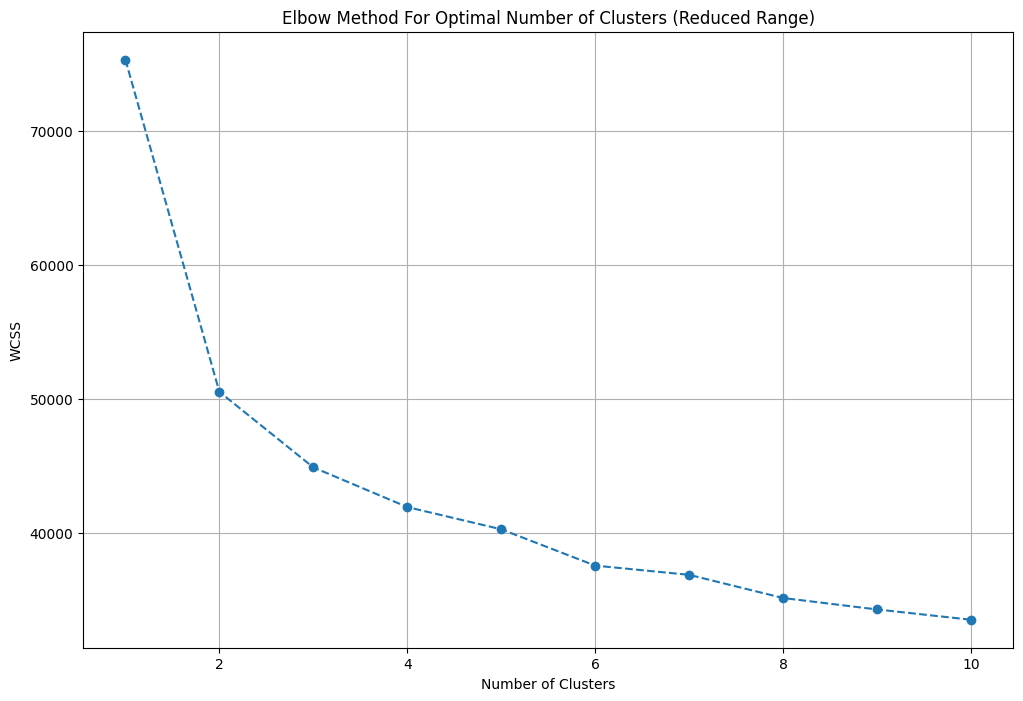

In [11]:

plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [12]:
features_binary_df.columns

Index(['Airy Rooms', 'Bank Attached Property', 'Centrally Air Conditioned',
       'Club house / Community Center', 'False Ceiling Lighting',
       'Feng Shui / Vaastu Compliant', 'Fitness Centre / GYM',
       'High Ceiling Height', 'Intercom Facility',
       'Internet/wi-fi connectivity', 'Lift(s)', 'Low Density Society',
       'Maintenance Staff', 'Natural Light', 'No open drainage around', 'Park',
       'Piped-gas', 'Power Back-up', 'Private Garden / Terrace',
       'Rain Water Harvesting', 'Recently Renovated', 'Security / Fire Alarm',
       'Security Personnel', 'Separate entry for servant room',
       'Shopping Centre', 'Spacious Interiors', 'Swimming Pool',
       'Visitor Parking', 'Waste Disposal', 'Water Storage', 'Water purifier',
       'Water softening plant'],
      dtype='object')

In [13]:

weights = {
    'Airy Rooms': 5,
    'Bank Attached Property': 3,
    'Centrally Air Conditioned': 8,
    'Club house / Community Center': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 4,
    'Fitness Centre / GYM': 7,
    'High Ceiling Height': 8,
    'Intercom Facility': 5,
    'Internet/wi-fi connectivity': 6,
    'Lift(s)': 5,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Natural Light': 5,
    'No open drainage around': 4,
    'Park': 6,
    'Piped-gas': 4,
    'Power Back-up': 7,
    'Private Garden / Terrace': 9,
    'Rain Water Harvesting': 5,
    'Recently Renovated': 5,
    'Security / Fire Alarm': 6,
    'Security Personnel': 8,
    'Separate entry for servant room': 6,
    'Shopping Centre': 6,
    'Spacious Interiors': 8,
    'Swimming Pool': 9,
    'Visitor Parking': 6,
    'Waste Disposal': 5,
    'Water Storage': 4,
    'Water purifier': 4,
    'Water softening plant': 5
}


In [14]:

luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [15]:
df['luxury_score'] = luxury_score

In [16]:
df.head()

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Features,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,Features_list,luxury_score
0,0,1.0,2,2.0,1,0,0.0,"0001, sector 90 gurgaon, gurgaon, haryana","Green court society, which is bang on 60-Meter...","['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",ashiana homes,green court,0.61,8840.0,690,14,14,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,3,90,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",88
1,1,3.0,2,2.0,1,0,0.0,"0001, sector 90 gurgaon, gurgaon, haryana","Green court society, which is bang on 60-Meter...","['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",ashiana homes,green court,0.70,10144.0,690,8,14,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,3,90,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",83
2,2,4.0,2,2.0,1,1,1.0,"sector 70a gurgaon, gurgaon, haryana",Available for sale 2 bhk semi furnished in pyr...,"['Airia Mall', 'Sohna Road', ""St. Angel's Glob...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",dbn group,pyramid urban homes,0.71,8492.0,836,9,17,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,3,70,"[Security / Fire Alarm, Feng Shui / Vaastu Com...",99
3,3,0.0,2,2.0,2,1,1.0,"sector 68 gurgaon, gurgaon, haryana",Looking for a 2 bhk property for sale in gurga...,"['Airia Mall', 'Southern Peripheral Road', 'So...","['Power Back-up', 'Security / Fire Alarm', 'In...",shree shyam properties,m3m the marina,1.55,12301.0,1260,9,20,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,68,"[Power Back-up, Security / Fire Alarm, Interco...",73
4,4,2.0,2,2.0,4,1,1.0,"101, sector 107 gurgaon, gurgaon, haryana",This 2 bhk apartment is available for sale in ...,"['Signum 107', 'Nora Solomon Medicenter', 'Ind...","['Power Back-up', 'Intercom Facility', 'Lift(s...",jbm buildtech pvt ltd,m3m woodshire,1.30,9516.0,1366,1,14,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,3,107,"[Power Back-up, Intercom Facility, Lift(s), Ma...",81


In [17]:
df = df.drop(columns = ['Features' , 'Features_list'])

In [18]:
df.sample(6)

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score
5030,5030,0.0,3,3.0,3,1,1.0,"1201, sector 65 gurgaon, gurgaon, haryana","Excellent location , 1828 sq ft apartment for ...","['Rapid Metro Sector 56', 'M3m 65th Avenue Mal...",jain consultancy services,m3m heights,3.29,18000.0,1828,19,34,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,65,189
5098,5098,0.0,4,4.0,4,0,1.0,"sector 67 gurgaon, gurgaon, haryana",4bhk flat with size 2350 sq. Ft is available f...,"['Omaxe City Centre Mall', 'Golf Course Extens...",gayatri properties,bestech park view spa next,3.60,20571.0,2350,8,14,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,4,67,120
5054,5054,0.0,3,4.0,2,0,1.0,"1104, sector 71 gurgaon, gurgaon, haryana","Chd avenue 71 , 3bhk+s, apartment is available...","['Huda City Centre', 'Apna Mart', 'Rajiv Chowk...",prop choice,chd avenue 71,1.59,9122.0,1743,6,14,0,0,1,0,1,0,0,1,1,0,1,1,1,0,0,4,71,104
5207,5207,7.0,3,4.0,4,1,1.0,"sector 53, sector 53 gurgaon, gurgaon, haryana",Located in the popular residential address of ...,"['Sector 53-54 Metro Station', 'Sahara Mall', ...",paras associates & developers,parsvnath exotica,7.80,33913.0,3505,8,18,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,5,53,128
762,762,2.0,2,2.0,3,1,1.0,"sector 67a gurgaon, gurgaon, haryana",Its 2bhk with store room semi furnished apartm...,"['Huda Metro Station (Gurugram)', 'Paras Trini...",home solutions,ireo the corridors,1.62,12000.0,1350,9,19,0,0,1,0,0,1,0,0,1,0,1,1,1,0,0,3,67,139
1054,1054,5.0,2,2.0,3,1,0.0,"sector 37d gurgaon, gurgaon, haryana",This lovely 2 bhk apartment/flat in sector 37d...,"['The Acura BMK', 'The Esplanade Mall', 'Dwark...",gupta property,signature global the millennia,0.63,10751.0,585,8,23,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,37,86


In [19]:
df['Locations_list'] = df['Nearby Locations'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

mlb = MultiLabelBinarizer()
locations_binary_matrix = mlb.fit_transform(df['Locations_list'])

locations_binary_df = pd.DataFrame(locations_binary_matrix, columns=mlb.classes_)

In [20]:
locations_binary_df.sample(6)

222  24 Seven Filling Station  24SEVEN  32nd Avenue (Milestone)  \
4625     1                         0        0                        0   
3424     0                         0        0                        0   
9328     0                         0        0                        0   
8347     0                         0        0                        0   
4848     0                         0        0                        0   
10888    0                         0        0                        0   

       32nd Milestone  98.4  ADDA  AFS Sports Center  AIPL Business Centre  \
4625                0     0     0                  0                     0   
3424                0     0     0                  0                     0   
9328                0     0     0                  0                     0   
8347                0     0     0                  0                     0   
4848                0     0     0                  0                     0   
10888               0     0     0                  0                     0   

       AIPL Business Club  AIPL Business Co Working Space  AIPL Joy Centre  \
4625                    0                               0                0   
3424                    0                               0                0   
9328                    0                               0                0   
8347                    0                               0                0   
4848                    0                               0                0   
10888                   0                               0                0   

       AIPL Joy Street Mall  AP SPORTS CRICKET GROUND  APJ Abdul Kalam Park  \
4625                      0                         0                     0   
3424                      0                         0                     0   
9328                      0                         0                     0   
8347                      0                         0                     0   
4848                      0                         0                     0   
10888                     0                         0                     0   

       AS Business Park  ASF Insignia SEZ  ATM  Aanyaz  Aanyaz Mall  \
4625                  0                 0    0       0            0   
3424                  0                 0    0       0            0   
9328                  0                 0    0       0            0   
8347                  0                 0    0       0            0   
4848                  0                 0    0       0            0   
10888                 0                 0    0       0            0   

       Aapno Ghar  AapnoGhar  AapnoGhar (Resort,Water, Amusemnt Park)  \
4625            0          0                                        0   
3424            0          0                                        0   
9328            0          0                                        0   
8347            0          0                                        0   
4848            0          0                                        0   
10888           0          0                                        0   

       AapnoGhar Amusement Park  AapnoGhar Park  Aarvy Healthcare  \
4625                          0               0                 0   
3424                          0               0                 0   
9328                          0               0                 0   
8347                          0               0                 0   
4848                          0               0                 0   
10888                         0               0                 0   

       Aarvy Healthcare Hospital  Aarvy Healthcare Super Speciality  \
4625                           0                                  0   
3424                           0                                  0   
9328                           0                                  0   
8347                           0                              

In [21]:
locations_binary_df.columns

Index(['222', '24 Seven Filling Station', '24SEVEN', '32nd Avenue (Milestone)',
       '32nd Milestone', '98.4', 'ADDA', 'AFS Sports Center',
       'AIPL Business Centre', 'AIPL Business Club',
       ...
       'distillery', 'fish point', 'govt sec school', 'iON Digital Zone',
       'iON Digital Zone (Gurugram)', 'iON Digital Zone, Gurgaon',
       'infinity Business Park', 'pracksht hospital', 'shiv Mandir',
       'tea stall'],
      dtype='object', length=1991)

In [22]:
df['Main Description'][609]

"Belgravia at resorts is set in one of gurugram's finest upscale residential location. Views over 20 acres of greens, belgravia has been designed to create a resort-Like ambiance with vast open spaces, beautifully landscaped gardens, water bodies, sports, recreational facilities and one of the finest clubhouses in the ncr region.Salient features\nExperience 360 living\nExperience: Reoprt living with zero vehicles on ground surface and an international tunnel drive way\nLive: Sky villa - Mansions in the sky, beau villa - Villa-Style apartments on the ground floor and belgravia - Resort residences\nPlay: Badmintons, lawn tennis, cricket nets, golf putting, open air chess, childerns aqua, terra park and more\nEnjoy: Yoga & medication, swmming, gym, spa, skating, jogging, walking, cycling and more\nIndulge: Multi-Cuisine restaurant, speciality cuisine-Vegetarian, italian gazebos, juice bar, ice-Cream, candy store etc\nNetwork: Neighbourhood of whos who with expats from more than 15 countri

In [23]:
df['Locations_list'] = df['Locations_list'].astype(str)

In [24]:
df['Text_info'] = df['Main Description'] + ' ' +  df['Dealer'] + ' ' + df['Society Name'] + ' ' + df['Locations_list']

In [25]:
df.head(5)

,Unnamed: 0,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Address,Main Description,Nearby Locations,Dealer,Society Name,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Locations_list,Text_info
0,0,1.0,2,2.0,1,0,0.0,"0001, sector 90 gurgaon, gurgaon, haryana","Green court society, which is bang on 60-Meter...","['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...",ashiana homes,green court,0.61,8840.0,690,14,14,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,3,90,88,"['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","Green court society, which is bang on 60-Meter..."
1,1,3.0,2,2.0,1,0,0.0,"0001, sector 90 gurgaon, gurgaon, haryana","Green court society, which is bang on 60-Meter...","['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...",ashiana homes,green court,0.70,10144.0,690,8,14,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,3,90,83,"['Baba Kanala Chowk', 'Pataudi Rd', 'Gurukul P...","Green court society, which is bang on 60-Meter..."
2,2,4.0,2,2.0,1,1,1.0,"sector 70a gurgaon, gurgaon, haryana",Available for sale 2 bhk semi furnished in pyr...,"['Airia Mall', 'Sohna Road', ""St. Angel's Glob...",dbn group,pyramid urban homes,0.71,8492.0,836,9,17,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,3,70,99,"['Airia Mall', 'Sohna Road', ""St. Angel's Glob...",Available for sale 2 bhk semi furnished in pyr...
3,3,0.0,2,2.0,2,1,1.0,"sector 68 gurgaon, gurgaon, haryana",Looking for a 2 bhk property for sale in gurga...,"['Airia Mall', 'Southern Peripheral Road', 'So...",shree shyam properties,m3m the marina,1.55,12301.0,1260,9,20,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,68,73,"['Airia Mall', 'Southern Peripheral Road', 'So...",Looking for a 2 bhk property for sale in gurga...
4,4,2.0,2,2.0,4,1,1.0,"101, sector 107 gurgaon, gurgaon, haryana",This 2 bhk apartment is available for sale in ...,"['Signum 107', 'Nora Solomon Medicenter', 'Ind...",jbm buildtech pvt ltd,m3m woodshire,1.30,9516.0,1366,1,14,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,3,107,81,"['Signum 107', 'Nora Solomon Medicenter', 'Ind...",This 2 bhk apartment is available for sale in ...


In [26]:
df = df.drop(columns=['Address' , 'Main Description' , 'Nearby Locations' , 'Dealer' , 'Society Name' , 'Locations_list'])

In [27]:
df = df.drop(columns=['Unnamed: 0'])

In [28]:
df.sample(3)

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,given_area_in_sqft,floor_number,total_floors,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info
9470,0.0,4,4.0,3,1,1.0,3.50,10944.0,3198,5,24,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,1,102,117,Located in the popular residential address of ...
4506,0.0,3,3.0,4,1,1.0,2.05,11452.0,1790,3,14,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,108,73,"Experion heart song sector-108, dwarka express..."
7039,4.0,3,3.0,3,1,1.0,2.45,13409.0,1827,16,26,0,0,1,0,0,0,0,1,1,0,1,1,1,0,0,3,102,182,This beautiful 3 bhk flat in sector 102 gurgao...


In [29]:
df.columns

Index(['Facing', 'No_Bedroom', 'No_Bathroom', 'No_Balcony', 'Corner_Property',
       'Furnishing', 'Price_in_Crore', 'price_Per_Sqft_converted',
       'given_area_in_sqft', 'floor_number', 'total_floors',
       'AreaType_Built-up Area', 'AreaType_Carpet Area',
       'AreaType_Super Built-up Area', 'study room', 'servant room',
       'store room', 'pooja room', 'Overlooking_others',
       'Overlooking_main road', 'Overlooking_sea facing', 'Overlooking_club',
       'Overlooking_park/garden', 'Overlooking_pool',
       'Overlooking_lake facing', 'Overlooking_NA', 'flat_age', 'sector_num',
       'luxury_score', 'Text_info'],
      dtype='object')

In [30]:
df['AreaType_Built-up Area'].value_counts()

AreaType_Built-up Area
0    11801
1      643
Name: count, dtype: int64

In [31]:
df['AreaType_Carpet Area'].value_counts()

AreaType_Carpet Area
0    10596
1     1848
Name: count, dtype: int64

In [32]:
df['AreaType_Super Built-up Area'].value_counts()

AreaType_Super Built-up Area
1    9953
0    2491
Name: count, dtype: int64

In [33]:
df[['AreaType_Built-up Area', 'AreaType_Carpet Area', 'AreaType_Super Built-up Area', 'given_area_in_sqft']]


,AreaType_Built-up Area,AreaType_Carpet Area,AreaType_Super Built-up Area,given_area_in_sqft
0,0,0,1,690
1,0,0,1,690
2,0,0,1,836
3,0,0,1,1260
4,0,0,1,1366
...,...,...,...,...
12439,0,0,1,1790
12440,0,0,1,1805
12441,0,0,1,1999
12442,0,0,1,2383


In [34]:
df.isna().sum()

Facing                          0
No_Bedroom                      0
No_Bathroom                     0
No_Balcony                      0
Corner_Property                 0
Furnishing                      0
Price_in_Crore                  0
price_Per_Sqft_converted        0
given_area_in_sqft              0
floor_number                    0
total_floors                    0
AreaType_Built-up Area          0
AreaType_Carpet Area            0
AreaType_Super Built-up Area    0
study room                      0
servant room                    0
store room                      0
pooja room                      0
Overlooking_others              0
Overlooking_main road           0
Overlooking_sea facing          0
Overlooking_club                0
Overlooking_park/garden         0
Overlooking_pool                0
Overlooking_lake facing         0
Overlooking_NA                  0
flat_age                        0
sector_num                      0
luxury_score                    0
Text_info     

In [35]:
df.loc[df['AreaType_Built-up Area'] == 1, 'Super Built-up Area'] = df['given_area_in_sqft'] * 1.2

df.loc[df['AreaType_Carpet Area'] == 1, 'Super Built-up Area'] = df['given_area_in_sqft'] * 1.35
df.loc[df['AreaType_Super Built-up Area'] == 1 , 'Super Built-up Area'] = df['given_area_in_sqft'] * 1   

In [36]:
df['Super Built-up Area'].isna().sum()

np.int64(0)

In [37]:
df = df.drop(columns = ['given_area_in_sqft' , 'AreaType_Built-up Area', 'AreaType_Carpet Area', 'AreaType_Super Built-up Area'])

In [38]:
df.iloc[580]

Facing                                                                    0.0
No_Bedroom                                                                  2
No_Bathroom                                                               2.0
No_Balcony                                                                  3
Corner_Property                                                             1
Furnishing                                                                2.0
Price_in_Crore                                                            3.5
price_Per_Sqft_converted                                              13461.0
floor_number                                                                0
total_floors                                                                0
study room                                                                  0
servant room                                                                0
store room                                                      

In [39]:
df['floor_ratio'] = df['floor_number']/df['total_floors']

In [40]:
df = df.drop(columns = ['floor_number' , 'total_floors',])



In [41]:
df.shape

(12444, 26)

In [42]:
df.sample(4)

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info,Super Built-up Area,floor_ratio
5259,4.0,4,4.0,4,0,1.0,4.55,18200.0,1,1,1,1,0,0,0,1,1,1,0,0,4,81,113,4+1 bhk flat for resale in dlf ultima property...,2872.0,0.827586
3080,2.0,3,3.0,4,1,1.0,3.00,14381.0,0,1,0,0,1,1,1,1,1,1,0,0,3,82,45,This lovely 3 bhk apartment/flat in sector 82a...,2086.0,0.812500
1105,4.0,2,2.0,3,0,1.0,1.95,13402.0,0,0,0,0,0,1,0,1,1,1,0,0,1,111,77,"Situated in sector 111 gurgaon, kashish manor ...",1455.0,0.400000
7317,0.0,3,3.0,4,1,1.0,3.70,19525.0,1,0,0,0,1,1,1,1,1,1,0,0,2,111,76,This beautiful 3 bhk flat in sector 111 gurgao...,1895.0,0.187500


In [43]:
df.isna().sum()

Facing                      0
No_Bedroom                  0
No_Bathroom                 0
No_Balcony                  0
Corner_Property             0
Furnishing                  0
Price_in_Crore              0
price_Per_Sqft_converted    0
study room                  0
servant room                0
store room                  0
pooja room                  0
Overlooking_others          0
Overlooking_main road       0
Overlooking_sea facing      0
Overlooking_club            0
Overlooking_park/garden     0
Overlooking_pool            0
Overlooking_lake facing     0
Overlooking_NA              0
flat_age                    0
sector_num                  0
luxury_score                0
Text_info                   0
Super Built-up Area         0
floor_ratio                 1
dtype: int64

In [52]:
df.shape

(12443, 26)

In [51]:
df = df.dropna()

In [49]:
df.sample(3)

,Facing,No_Bedroom,No_Bathroom,No_Balcony,Corner_Property,Furnishing,Price_in_Crore,price_Per_Sqft_converted,study room,servant room,store room,pooja room,Overlooking_others,Overlooking_main road,Overlooking_sea facing,Overlooking_club,Overlooking_park/garden,Overlooking_pool,Overlooking_lake facing,Overlooking_NA,flat_age,sector_num,luxury_score,Text_info,Super Built-up Area,floor_ratio
4377,6.0,3,3.0,3,1,1.0,3.3,18343.0,0,0,0,0,0,1,0,0,1,0,0,0,3,82,160,Looking for a 3 bhk property for sale in gurga...,1799.0,0.250000
8903,4.0,4,4.0,4,1,1.0,4.3,9454.0,0,1,0,0,0,0,0,1,1,0,0,0,1,102,182,This lovely 4 bhk apartment/flat in sector 102...,4548.0,0.333333
3999,6.0,4,4.0,3,1,1.0,8.5,31434.0,0,1,0,0,1,1,0,0,1,1,0,0,4,54,126,This lovely 4 bhk apartment/flat in sector 54 ...,3650.4,0.600000


In [50]:
df['Furnishing'].value_counts()

Furnishing
1.0    9691
0.0    2221
2.0     531
Name: count, dtype: int64

In [45]:
df.to_csv("data_after_feature_engg.csv")